# 探索性数据分析
在价值预测的挑战中，Santander Group 提供了4900+的训练样本，需要提交测试结果的样本大概是训练样本的１０倍，而且训练数据的特征数量＞样本数量（明显的宽数据)，要求是预测客户的潜在价值

# 所需要用到的库

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import  model_selection, metrics

# 数据集加载

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
print('Test rows and columns : ', test.shape)
print('Train rows and columns :', train.shape)

Test rows and columns :  (200000, 201)
Train rows and columns : (200000, 202)


In [5]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


# Target的分布

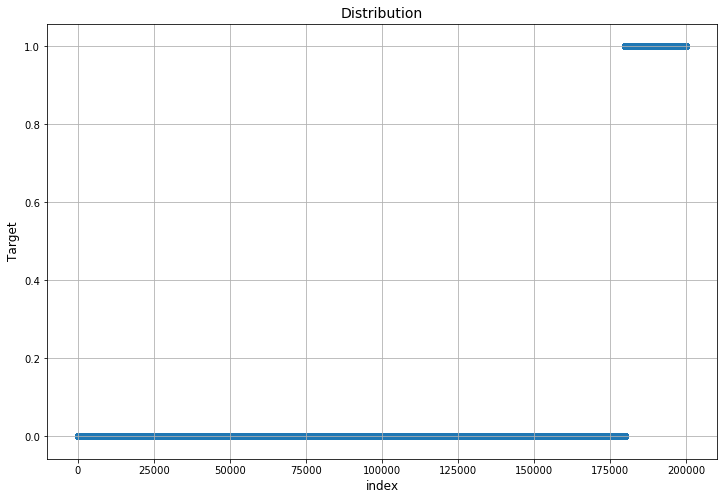

In [10]:
plt.figure(figsize=(12, 8))
plt.scatter(range(train.shape[0]), np.sort(train.target.values))
plt.grid()
plt.xlabel('index', fontsize=12)
plt.ylabel('Target', fontsize=12)
plt.title("Distribution", fontsize=14)
plt.show()

#Target的直方图 

Text(0.5, 1.0, 'Target Histogram')

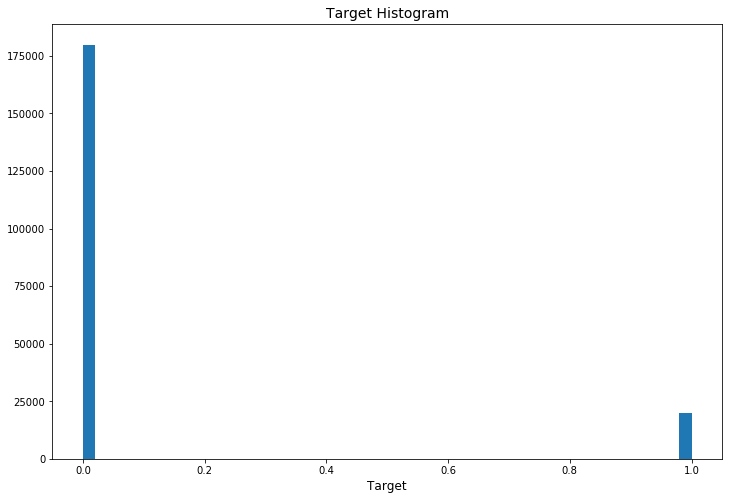

In [12]:
plt.figure(figsize=(12,8))
plt.hist(train.target.values, bins=50)
plt.xlabel('Target', fontsize=12)
plt.title("Target Histogram", fontsize=14)

# 缺失值查询

In [14]:
mis_value_counts = train.isnull().sum().reset_index()
mis_value_counts.rename(index = str,columns={'index':'Feature_name',0:'Count'},inplace=True)
(mis_value_counts.Count > 0).value_counts()

False    202
Name: Count, dtype: int64

# 检查数据类型

In [15]:
col_type = train.dtypes.reset_index()
col_type.rename(index = str, columns={'index':'Feature_name',0:'Type'},inplace=True)
(col_type.Type).value_counts()

float64    200
int64        1
object       1
Name: Type, dtype: int64

In [19]:
num_unique = train.nunique().reset_index()
num_unique.columns = ['Col_name','Value_count']

In [20]:
num_unique.head()

,Col_name,Value_count
0,ID_code,200000
1,target,2
2,var_0,94672
3,var_1,108932
4,var_2,86555


# 计算相关系数

In [ ]:
corr_df = train.corr(method = 'spearman')['target']

In [ ]:
corr_df

In [ ]:
corr_df = corrs[(corrs.Corr_value > 0.1) | (corrs.Corr_value < -0.1)].reset_index()

corr_df = corr_df.set_index('Feature_Name')
corr_df.plot(kind='barh', figsize = (12,15), title='Correlation of variables')